In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# np.zeros?
# make_classification?

In [3]:
n_samples = 1000
n_features = 2
train_rate = 0.8

In [4]:
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0, n_clusters_per_class=1)

In [5]:
# 原先的正样本为1，负样本为0，将负样本为0改为-1，使其满足感知机推导模型
y[y==0]=-1

In [6]:
train_split_index = int(train_rate*n_samples)
X_train = X[:train_split_index]
y_train = y[:train_split_index]

X_test= X[train_split_index:]
y_test = y[train_split_index:]

In [7]:
# X[0]
# w = np.zeros(len(X[0]))
# w
# np.dot(X[0], w)

In [8]:
def sign(X):
    if X>=0:
        return 1
    else:
        return -1

In [9]:
def perceptron_sgd(X, y):
    w = np.zeros(len(X[0]))
    eta = 1.0
    epoch = 100
    for t in range(epoch):
        for i, x in enumerate(X):
            if(np.dot(X[i], w)*y[i])<=0:
                w = w + eta*X[i]*y[i]    
    return w

In [10]:
w = perceptron_sgd(X_train, y_train)

In [11]:
wrong_indices = [i for i in range(n_samples) if(np.dot(X[i], w)*y[i])<=0]

In [12]:
# 误差率
len(wrong_indices)*1.0/len(y)

0.083

In [13]:
# 获取正负样本的X1和X2特征值
pos_X_1 = [X[i, 0] for i in range(n_samples) if y[i]==1]
pos_X_2 = [X[i, 1] for i in range(n_samples) if y[i]==1]

neg_X_1 = [X[i, 0] for i in range(n_samples) if y[i]==-1]
neg_X_2 = [X[i, 1] for i in range(n_samples) if y[i]==-1]

In [14]:
# 绘制感知机模型分类效果
x1_range = np.arange(-4, 4, 0.01)
# 感知机模型的精度
x2_range = -x1_range*w[0]/w[1]

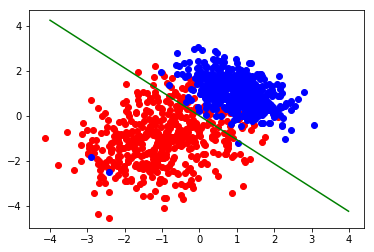

In [15]:
# 绘制正负样本的散点图
plt.scatter(pos_X_1, pos_X_2, c = 'r')
plt.scatter(neg_X_1, neg_X_2, c= 'b')
# 感知机模型分类曲线
plt.plot(x1_range, x2_range, c= 'g')

In [16]:
# x1_range*w[1]/w[0]